In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

from matplotlib import gridspec 

In [2]:
data = pd.read_csv("creditcard.csv") 

In [3]:
data.head()

Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28  Amount  Class  
0 -0.189115  0.133558 -0.021053  149.62      0  
1  0.125895 -0.008983  0.014724    2.69      0  
2 -0.139097 -0.055353 -0.059752  378.66      0  
3 -0.221929  0.062723  0.061458  123.50      0  
4  0.502292  0.219422  0.215153   69.99      0  

[5 rows x 31 columns]

In [4]:
fraud = data[data['Class'] == 1] 
valid = data[data['Class'] == 0] 
outlierFraction = len(fraud)/float(len(valid)) 
print('Outlier Fraction : ',outlierFraction) 
print('Fraud Cases: {}'.format(len(data[data['Class'] == 1]))) 
print('Valid Transactions: {}'.format(len(data[data['Class'] == 0])))

Outlier Fraction :  0.0017304750013189597
Fraud Cases: 492
Valid Transactions: 284315


In [5]:
print('Amount details of the fraudulent transaction') 
fraud.Amount.describe()

Amount details of the fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [6]:
print('Amount details of valid transaction') 
valid.Amount.describe() 

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [7]:
X = data.drop(['Class'], axis = 1) 
Y = data["Class"] 
print(X.shape) 
print(Y.shape) 

xData = X.values 
yData = Y.values 

(284807, 30)
(284807,)


In [8]:
X

Time         V1         V2        V3        V4        V5  \
0            0.0  -1.359807  -0.072781  2.536347  1.378155 -0.338321   
1            0.0   1.191857   0.266151  0.166480  0.448154  0.060018   
2            1.0  -1.358354  -1.340163  1.773209  0.379780 -0.503198   
3            1.0  -0.966272  -0.185226  1.792993 -0.863291 -0.010309   
4            2.0  -1.158233   0.877737  1.548718  0.403034 -0.407193   
5            2.0  -0.425966   0.960523  1.141109 -0.168252  0.420987   
6            4.0   1.229658   0.141004  0.045371  1.202613  0.191881   
7            7.0  -0.644269   1.417964  1.074380 -0.492199  0.948934   
8            7.0  -0.894286   0.286157 -0.113192 -0.271526  2.669599   
9            9.0  -0.338262   1.119593  1.044367 -0.222187  0.499361   
10          10.0   1.449044  -1.176339  0.913860 -1.375667 -1.971383   
11          10.0   0.384978   0.616109 -0.874300 -0.094019  2.924584   
12          10.0   1.249999  -1.221637  0.383930 -1.234899 -1.485419   
13          11.0   1.069374   0.287722  0.828613  2.712520 -0.178398   
14          12.0  -2.791855  -0.327771  1.641750  1.767473 -0.136588   
15          12.0  -0.752417   0.345485  2.057323 -1.468643 -1.158394   
16          12.0   1.103215  -0.040296  1.267332  1.289091 -0.735997   
17          13.0  -0.436905   0.918966  0.924591 -0.727219  0.915679   
18          14.0  -5.401258  -5.450148  1.186305  1.736239  3.049106   
19          15.0   1.492936  -1.029346  0.454795 -1.438026 -1.555434   
20          16.0   0.694885  -1.361819  1.029221  0.834159 -1.191209   
21          17.0   0.962496   0.328461 -0.171479  2.109204  1.129566   
22          18.0   1.166616   0.502120 -0.067300  2.261569  0.428804   
23          18.0   0.247491   0.277666  1.185471 -0.092603 -1.314394   
24          22.0  -1.946525  -0.044901 -0.405570 -1.013057  2.941968   
25          22.0  -2.074295  -0.121482  1.322021  0.410008  0.295198   
26          23.0   1.173285   0.353498  0.283905  1.133563 -0.172577   
27          23.0   1.322707  -0.174041  0.434555  0.576038 -0.836758   
28          23.0  -0.414289   0.905437  1.727453  1.473471  0.007443   
29          23.0   1.059387  -0.175319  1.266130  1.186110 -0.786002   
...          ...        ...        ...       ...       ...       ...   
284777  172764.0   2.079137  -0.028723 -1.343392  0.358000 -0.045791   
284778  172764.0  -0.764523   0.588379 -0.907599 -0.418847  0.901528   
284779  172766.0   1.975178  -0.616244 -2.628295 -0.406246  2.327804   
284780  172766.0  -1.727503   1.108356  2.219561  1.148583 -0.884199   
284781  172766.0  -1.139015  -0.155510  1.894478 -1.138957  1.451777   
284782  172767.0  -0.268061   2.540315 -1.400915  4.846661  0.639105   
284783  172768.0  -1.796092   1.929178 -2.828417 -1.689844  2.199572   
284784  172768.0  -0.669662   0.923769 -1.543167 -1.560729  2.833960   
284785  172768.0   0.032887   0.545338 -1.185844 -1.729828  2.932315   
284786  172768.0  -2.076175   2.142238 -2.522704 -1.888063  1.982785   
284787  172769.0  -1.029719  -1.110670 -0.636179 -0.840816  2.424360   
284788  172770.0   2.007418  -0.280235 -0.208113  0.335261 -0.715798   
284789  172770.0  -0.446951   1.302212 -0.168583  0.981577  0.578957   
284790  172771.0  -0.515513   0.971950 -1.014580 -0.677037  0.912430   
284791  172774.0  -0.863506   0.874701  0.420358 -0.530365  0.356561   
284792  172774.0  -0.724123   1.485216 -1.132218 -0.607190  0.709499   
284793  172775.0   1.971002  -0.699067 -1.697541 -0.617643  1.718797   
284794  172777.0  -1.266580  -0.400461  0.956221 -0.723919  1.531993   
284795  172778.0 -12.516732  10.187818 -8.476671 -2.510473 -4.586669   
284796  172780.0   1.884849  -0.143540 -0.999943  1.506772 -0.035300   
284797  172782.0  -0.241923   0.712247  0.399806 -0.463406  0.244531   
284798  172782.0   0.219529   0.881246 -0.635891  0.960928 -0.152971   
284799  172783.0  -1.775135  -0.004235  1.189786  0.331096  1.196063   
284800  172784.0   2.039560  -0.175233 -1.196825  0.

In [9]:
Y

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
284777    0
284778    0
284779    0
284780    0
284781    0
284782    0
284783    0
284784    0
284785    0
284786    0
284787    0
284788    0
284789    0
284790    0
284791    0
284792    0
284793    0
284794    0
284795    0
284796    0
284797    0
284798    0
284799    0
284800    0
284801    0
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split 
# Split the data into training and testing sets 
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

In [11]:
from sklearn.ensemble import RandomForestClassifier 
# random forest model creation 
rfc = RandomForestClassifier() 
rfc.fit(xTrain, yTrain) 
# predictions 
yPred = rfc.predict(xTest) 

C:\Users\Vasanthan\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [12]:
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import precision_score, recall_score 
from sklearn.metrics import f1_score, matthews_corrcoef 
from sklearn.metrics import confusion_matrix 

n_outliers = len(fraud) 
n_errors = (yPred != yTest).sum() 
print("The model used is Random Forest classifier") 

acc = accuracy_score(yTest, yPred) 
print("The accuracy is {}".format(acc)) 

prec = precision_score(yTest, yPred) 
print("The precision is {}".format(prec)) 

rec = recall_score(yTest, yPred) 
print("The recall is {}".format(rec)) 

f1 = f1_score(yTest, yPred) 
print("The F1-Score is {}".format(f1)) 

MCC = matthews_corrcoef(yTest, yPred) 
print("The Matthews correlation coefficient is{}".format(MCC)) 


The model used is Random Forest classifier
The accuracy is 0.9994908886626171
The precision is 0.9367088607594937
The recall is 0.7551020408163265
The F1-Score is 0.8361581920903955
The Matthews correlation coefficient is0.8407793134319047


In [13]:
print(yTest)

[1 0 0 ... 0 0 0]


In [14]:
print(xTest[0].reshape(1,-1))

[[ 4.15050000e+04 -1.65265066e+01  8.58497180e+00 -1.86498532e+01
   9.50559352e+00 -1.37938185e+01 -2.83240430e+00 -1.67016943e+01
   7.51734390e+00 -8.50705864e+00 -1.41101844e+01  5.29923635e+00
  -1.08340065e+01  1.67112025e+00 -9.37385858e+00  3.60805642e-01
  -9.89924654e+00 -1.92362924e+01 -8.39855199e+00  3.10173537e+00
  -1.51492344e+00  1.19073869e+00 -1.12767001e+00 -2.35857877e+00
   6.73461329e-01 -1.41369967e+00 -4.62762361e-01 -2.01857525e+00
  -1.04280417e+00  3.64190000e+02]]


In [15]:
rfc.predict_proba(xTest[0].reshape(1,-1))

array([[0., 1.]])

In [13]:
classes = ['valid','fraud']

# LIME

In [17]:
import lime.lime_tabular

X_featurenames = X.columns
explainer = lime.lime_tabular.LimeTabularExplainer(np.array(xTrain), feature_names=X_featurenames, verbose=True, mode='regression')

In [16]:
idx = 2
print('Document id: %d' % idx)
print('Probability(valid) =', rfc.predict_proba(xTest[idx].reshape(1,-1))[0,0])
print('Probability(fraud) =', rfc.predict_proba(xTest[idx].reshape(1,-1))[0,1])
print('True class: %s' % classes[yTest[idx]])

Document id: 2
Probability(valid) = 1.0
Probability(fraud) = 0.0
True class: valid


Intercept -0.0036671163121410203
Prediction_local [0.01228389]
Right: 1


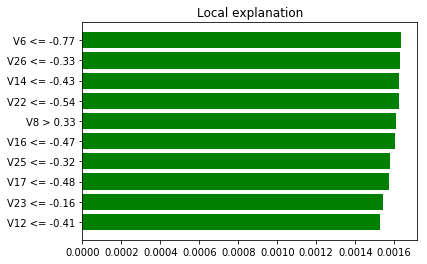

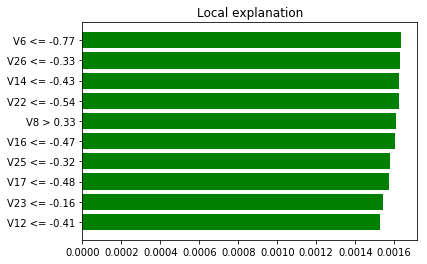

In [23]:
exp = explainer.explain_instance(xTest[idx], rfc.predict, num_features=10)
exp.as_pyplot_figure()

In [24]:
exp.as_list(label=1)

[('V6 <= -0.77', 0.001636708909276233),
 ('V26 <= -0.33', 0.0016306458189145328),
 ('V14 <= -0.43', 0.0016264827463934115),
 ('V22 <= -0.54', 0.0016226595273599446),
 ('V8 > 0.33', 0.0016082370495308764),
 ('V16 <= -0.47', 0.0016041000433464193),
 ('V25 <= -0.32', 0.0015810865327089629),
 ('V17 <= -0.48', 0.0015728063301103069),
 ('V23 <= -0.16', 0.0015417060302792146),
 ('V12 <= -0.41', 0.0015265764910865)]

In [19]:
idx = 0
print('Document id: %d' % idx)
print('Probability(valid) =', rfc.predict_proba(xTest[idx].reshape(1,-1))[0,0])
print('Probability(fraud) =', rfc.predict_proba(xTest[idx].reshape(1,-1))[0,1])
print('True class: %s' % classes[yTest[idx]])

Document id: 0
Probability(valid) = 0.0
Probability(fraud) = 1.0
True class: fraud


Intercept -0.003551572493956268
Prediction_local [0.01199459]
Right: 1


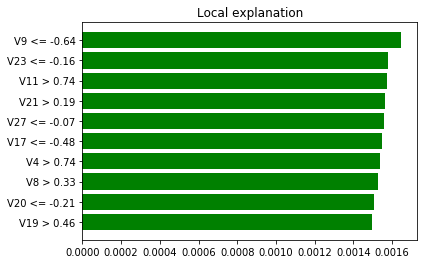

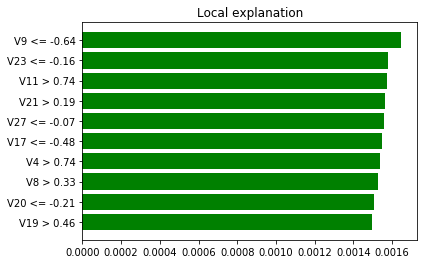

In [31]:
exp = explainer.explain_instance(xTest[idx], rfc.predict, num_features=10)
exp.as_pyplot_figure()

In [32]:
exp.as_list(label=1)

[('V9 <= -0.64', 0.0016483889510017227),
 ('V23 <= -0.16', 0.0015819490965556576),
 ('V11 > 0.74', 0.0015745183069150097),
 ('V21 > 0.19', 0.0015621012415681116),
 ('V27 <= -0.07', 0.0015581151714451748),
 ('V17 <= -0.48', 0.0015483698700138465),
 ('V4 > 0.74', 0.0015401757915517466),
 ('V8 > 0.33', 0.0015278174314523071),
 ('V20 <= -0.21', 0.0015089371305821728),
 ('V19 > 0.46', 0.0014957922718180628)]

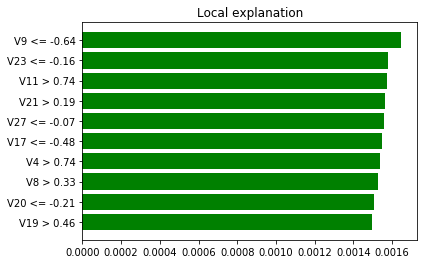

In [33]:
%matplotlib inline
fig = exp.as_pyplot_figure(label=1)

# AIX360 Metric

In [ ]:
def faithfulness_metric(model, x, coefs, base):
    pred_class = np.argmax(model.predict_proba(x.reshape(1,-1)), axis=1)[0]

    ar = np.argsort(-coefs)  
    pred_probs = np.zeros(x.shape[0])
    for ind in np.nditer(ar):
        x_copy = x.copy()
        x_copy[ind] = base[ind]
        x_copy_pr = model.predict_proba(x_copy.reshape(1,-1))
        pred_probs[ind] = x_copy_pr[0][pred_class]

    return -np.corrcoef(coefs, pred_probs)[0,1]


def monotonicity_metric(model, x, coefs, base):

    pred_class = np.argmax(model.predict_proba(x.reshape(1,-1)), axis=1)[0]

    x_copy = base.copy()

    ar = np.argsort(coefs)
    pred_probs = np.zeros(x.shape[0])
    for ind in np.nditer(ar):
        x_copy[ind] = x[ind]
        x_copy_pr = model.predict_proba(x_copy.reshape(1,-1))
        pred_probs[ind] = x_copy_pr[0][pred_class]

    return np.all(np.diff(pred_probs[ar]) >= 0)

In [41]:
from aix360.metrics import faithfulness_metric, monotonicity_metric

if rfc.predict_proba(xTest[idx].reshape(1,-1))[0,0] > 0.5:
    predicted_class = 0
else:
    predicted_class = 1
print(predicted_class)

le = exp.local_exp[predicted_class]

m = exp.as_map()

x = xTest[idx]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]


base = np.zeros(x.shape[0])
print (coefs)
print (base)


print("Faithfulness: ", faithfulness_metric(rfc, x, coefs, base))
print("Monotonity: ", monotonicity_metric(rfc, x, coefs, base))

1
[0.         0.         0.         0.         0.00154018 0.
 0.         0.         0.00152782 0.00164839 0.         0.00157452
 0.         0.         0.         0.         0.         0.00154837
 0.         0.00149579 0.00150894 0.0015621  0.         0.00158195
 0.         0.         0.         0.00155812 0.         0.        ]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Faithfulness:  -0.20234039519112734
Monotonity:  True


In [24]:
ncases = 100

mon = np.zeros(ncases)

for i in range(ncases):
    predicted_class = rfc.predict(xTest[i].reshape(1,-1))[0]
    exp = explainer.explain_instance(xTest[i], rfc.predict_proba, num_features=4, top_labels=1)
    le = exp.local_exp[predicted_class]
    m = exp.as_map()
    
    x = xTest[i]
    coefs = np.zeros(x.shape[0])
    
    for v in le:
        coefs[v[0]] = v[1]

    mon[i] = monotonicity_metric(rfc, xTest[i], coefs, base)
print("% of test records where explanation is monotonic",np.mean(mon))

Intercept 0.9998512326035671
Prediction_local [0.97860264]
Right: 0.0
Intercept 0.9949875395068154
Prediction_local [0.99224866]
Right: 1.0
Intercept 0.9968450833578558
Prediction_local [0.99076082]
Right: 1.0
Intercept 0.9964785366430164
Prediction_local [0.98961907]
Right: 1.0
Intercept 0.9935759644131683
Prediction_local [0.99885064]
Right: 1.0
Intercept 0.9973518122986277
Prediction_local [0.98742331]
Right: 1.0
Intercept 0.9945728691975189
Prediction_local [0.99428416]
Right: 1.0
Intercept 0.995712816301201
Prediction_local [0.99171644]
Right: 1.0
Intercept 0.9950351047063231
Prediction_local [0.99468198]
Right: 1.0
Intercept 0.9949652165381168
Prediction_local [0.99602683]
Right: 1.0
Intercept 0.9942331516460293
Prediction_local [0.99550507]
Right: 1.0
Intercept 0.9942363046731778
Prediction_local [0.99564338]
Right: 1.0
Intercept 0.9971425784495225
Prediction_local [0.98570188]
Right: 1.0
Intercept 0.9953508810231236
Prediction_local [0.995815]
Right: 1.0
Intercept 0.99627701161

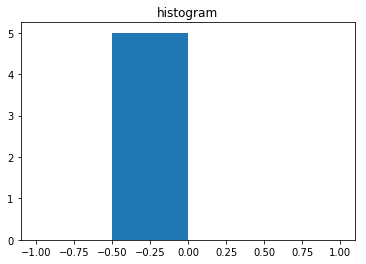

In [27]:
plt.hist(fait, bins = [-1.0,-0.5,0,0.5,1.0]) 
plt.title("histogram") 
plt.show()

In [29]:
exp = explainer.explain_instance(xTest[idx], rfc.predict, num_features=5)

Intercept -0.0016226583350664665
Prediction_local [0.00642922]
Right: 1


In [30]:
from aix360.metrics import faithfulness_metric, monotonicity_metric

if rfc.predict_proba(xTest[idx].reshape(1,-1))[0,0] > 0.5:
    predicted_class = 0
else:
    predicted_class = 1
print(predicted_class)

le = exp.local_exp[predicted_class]

m = exp.as_map()

x = xTest[idx]
coefs = np.zeros(x.shape[0])

for v in le:
    coefs[v[0]] = v[1]


base = np.zeros(x.shape[0])
print (coefs)
print (base)


print("Faithfulness: ", faithfulness_metric(rfc, x, coefs, base))
print("Monotonity: ", monotonicity_metric(rfc, x, coefs, base))

1
[0.         0.         0.         0.         0.         0.
 0.         0.00158538 0.         0.         0.         0.
 0.         0.00168147 0.00154764 0.00155865 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00167874]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Faithfulness:  -0.010969453646881474
Monotonity:  False


In [31]:
ncases = 100

mon = np.zeros(ncases)

for i in range(ncases):
    predicted_class = rfc.predict(xTest[i].reshape(1,-1))[0]
    exp = explainer.explain_instance(xTest[i], rfc.predict_proba, num_features=4, top_labels=1)
    le = exp.local_exp[predicted_class]
    m = exp.as_map()
    
    x = xTest[i]
    coefs = np.zeros(x.shape[0])
    
    for v in le:
        coefs[v[0]] = v[1]

    mon[i] = monotonicity_metric(rfc, xTest[i], coefs, base)
print("% of test records where explanation is monotonic",np.mean(mon))

Intercept 1.0005644970864302
Prediction_local [0.97464908]
Right: 0.0
Intercept 0.995045895377455
Prediction_local [0.99708428]
Right: 1.0
Intercept 0.9968043115358045
Prediction_local [0.9877713]
Right: 1.0
Intercept 0.9958910007610922
Prediction_local [0.99085491]
Right: 1.0
Intercept 0.9949530657590765
Prediction_local [0.9948335]
Right: 1.0
Intercept 0.9975224205822263
Prediction_local [0.98768322]
Right: 1.0
Intercept 0.9939702163939084
Prediction_local [0.99892357]
Right: 1.0
Intercept 0.9963476786791179
Prediction_local [0.98950072]
Right: 1.0
Intercept 0.9935091241510008
Prediction_local [0.99559006]
Right: 1.0
Intercept 0.9956821768741151
Prediction_local [0.99525195]
Right: 1.0
Intercept 0.993958273031999
Prediction_local [0.99823818]
Right: 1.0
Intercept 0.9956987174436139
Prediction_local [0.99007134]
Right: 1.0
Intercept 0.9983958338248705
Prediction_local [0.98352052]
Right: 1.0
Intercept 0.9936469769230767
Prediction_local [0.99841624]
Right: 1.0
Intercept 0.995961536788

# Sub-Modular Pick

In [57]:
from lime import submodular_pick

sp_obj = submodular_pick.SubmodularPick(explainer, np.array(xTrain), rfc.predict_proba, labels = (0,1), sample_size=10, num_features=15)

Intercept 0.9968255539595238
Prediction_local [0.9959684]
Right: 1.0
Intercept 0.9994253506725378
Prediction_local [0.98805504]
Right: 0.9
Intercept 0.9972281847963651
Prediction_local [0.99503926]
Right: 1.0
Intercept 0.9955914186622314
Prediction_local [1.00033767]
Right: 1.0
Intercept 0.9986708193040627
Prediction_local [0.99188347]
Right: 1.0
Intercept 0.9961328618401144
Prediction_local [1.00075838]
Right: 1.0
Intercept 0.9971271323235038
Prediction_local [0.99446324]
Right: 1.0
Intercept 0.9969176975940763
Prediction_local [0.99597325]
Right: 1.0
Intercept 0.9992555049315007
Prediction_local [0.98905794]
Right: 1.0
Intercept 0.9968156706056536
Prediction_local [0.99636029]
Right: 1.0


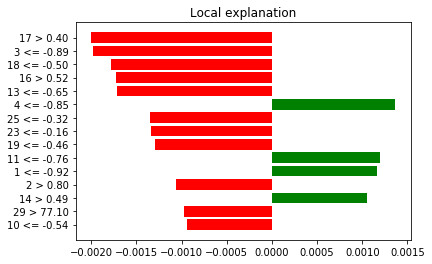

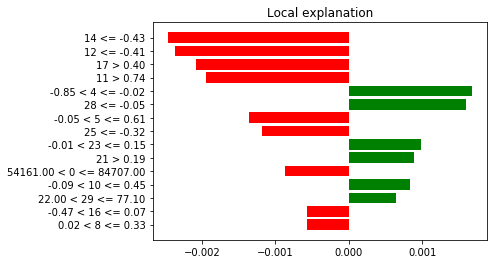

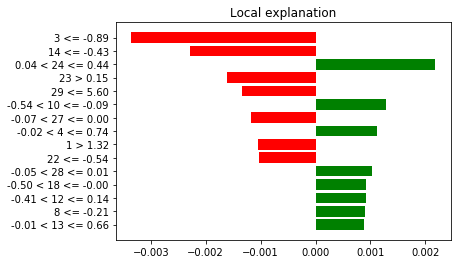

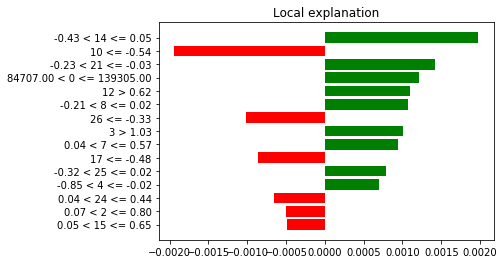

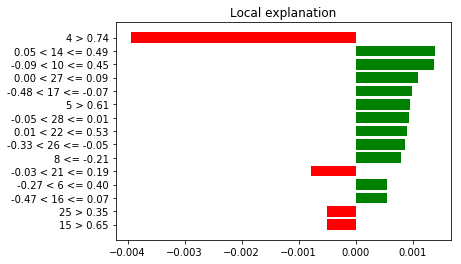

In [58]:
[exp.as_pyplot_figure() for exp in sp_obj.sp_explanations];

# SHAP

In [17]:
# Shapley Additive Explanations
from sklearn.linear_model import LogisticRegression
import shap

# load JS visualization code to notebook
shap.initjs()

model = LogisticRegression(penalty="l1", C=0.1)
model.fit(xTrain, yTrain)

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.


LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l1', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
explainer = shap.LinearExplainer(model, xTest, feature_dependence="independent")
shap_values = explainer.shap_values(xTest)

The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


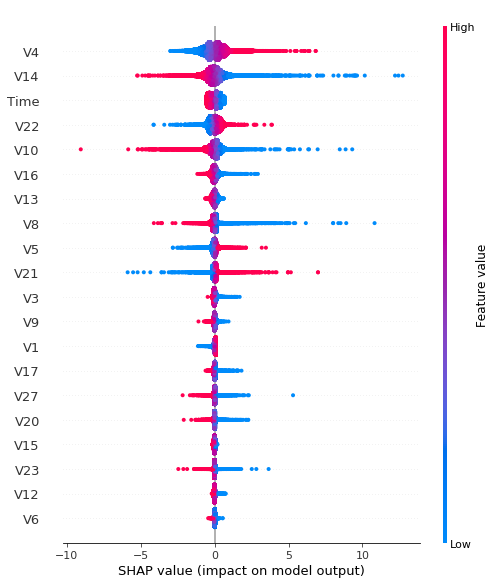

In [21]:
shap.summary_plot(shap_values, xTest, feature_names=feature_names)

In [89]:
ind = 10

print(xTest[ind])

shap.force_plot(
    explainer.expected_value, shap_values[ind], xTest[ind],
    feature_names=feature_names
)

[ 8.10550000e+04 -1.59300239e+00  7.56802901e-01  1.27400243e+00
  2.44126704e-01  3.35044887e-01  2.72886373e-01  3.89541829e-01
  6.76943851e-01 -5.79538573e-01 -8.19436287e-01  3.62192736e-01
  4.36744883e-01 -1.14896929e+00  5.73126491e-01 -1.21521778e+00
 -1.30036222e-01 -8.69516954e-02 -1.16533191e-01 -3.73488785e-01
 -2.93183927e-01  3.16812608e-02 -6.33551487e-02 -2.68928153e-01
 -3.21185987e-01  6.81499860e-01 -3.90287080e-01 -1.95157924e-01
 -3.94834874e-02  4.35000000e+01]


In [105]:
explainer = shap.TreeExplainer(rfc, X)
shap_values = explainer.shap_values(X)

100%|===================| 568648/569614 [04:45<00:00]        

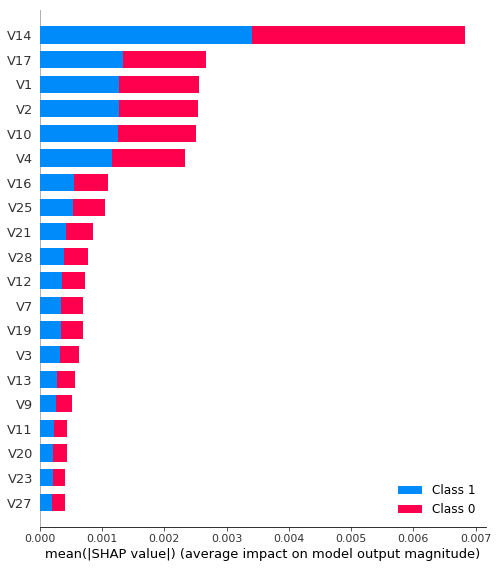

In [101]:
shap.summary_plot(shap_values, xTest, feature_names=feature_names)

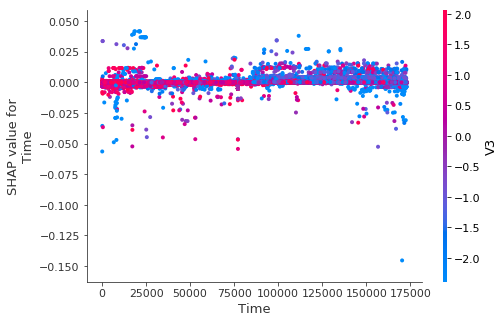

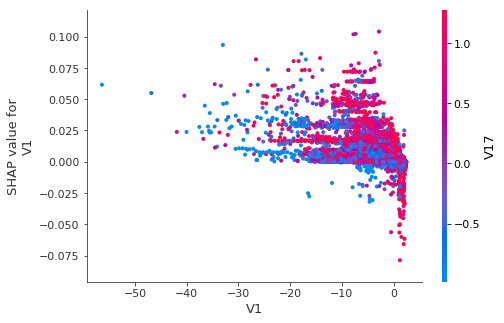

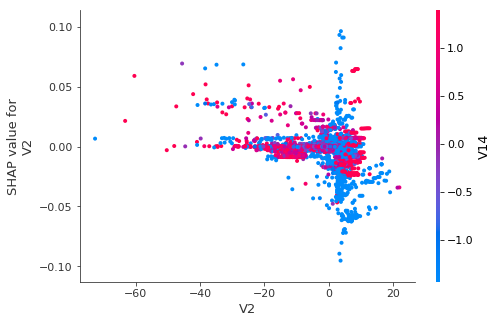

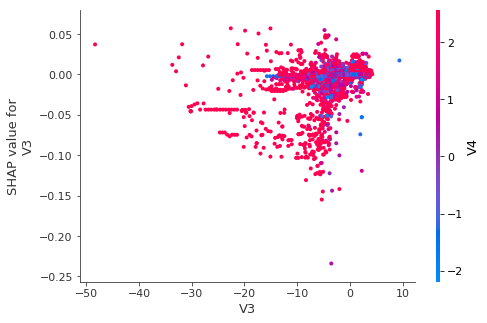

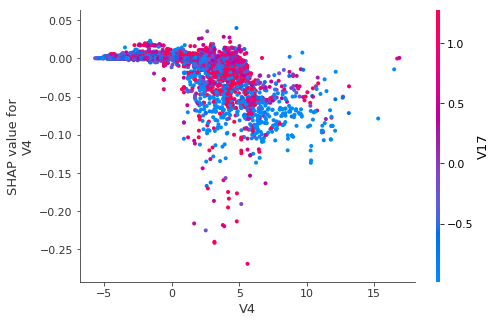

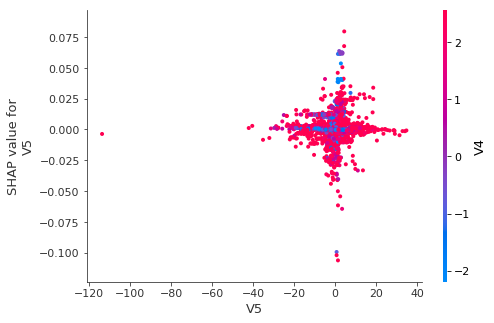

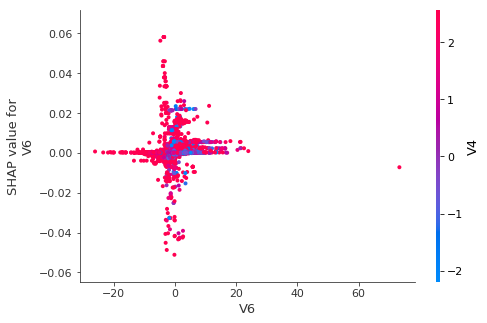

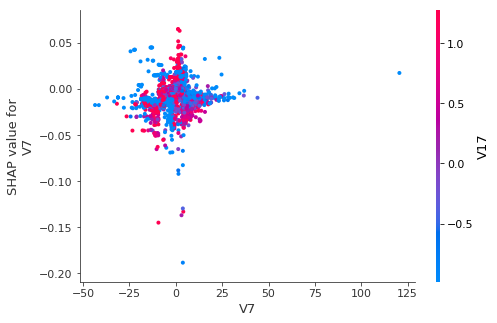

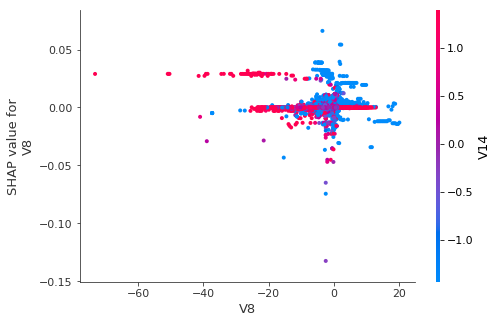

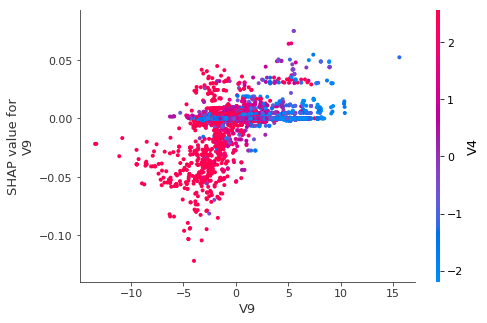

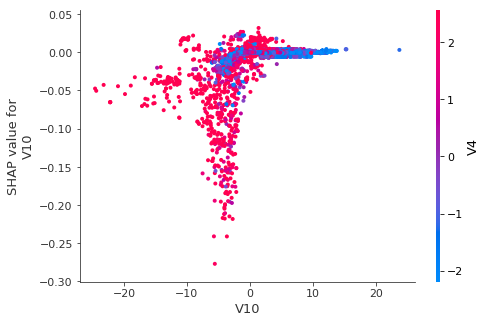

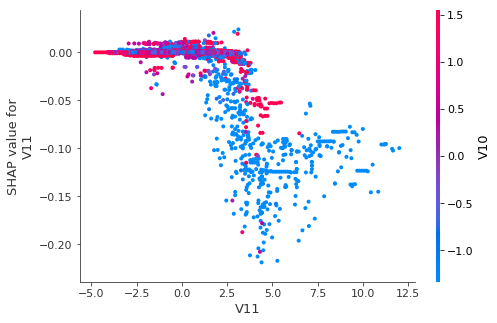

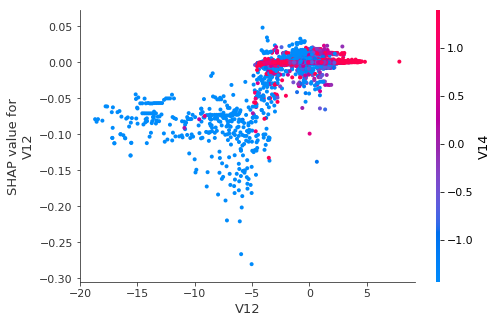

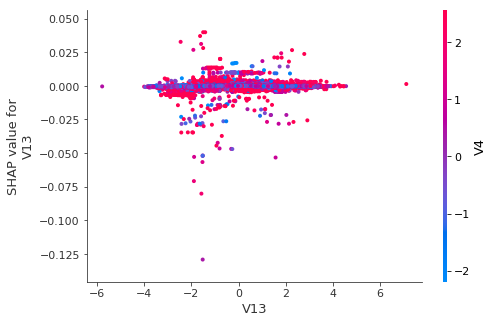

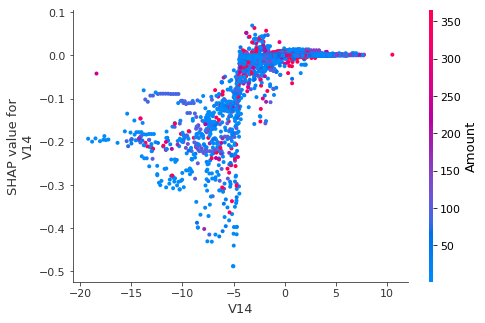

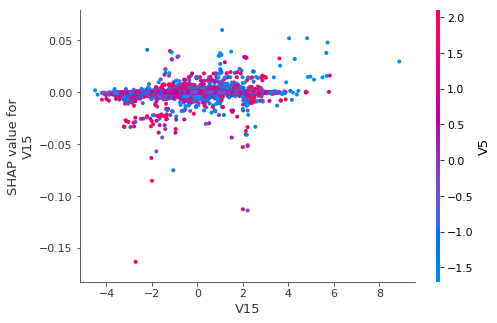

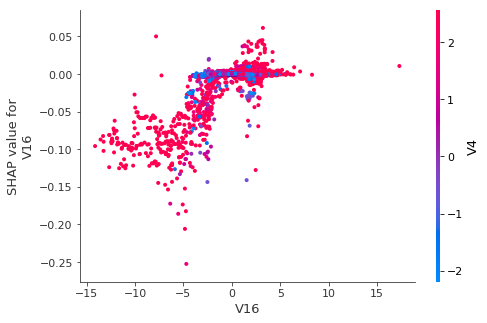

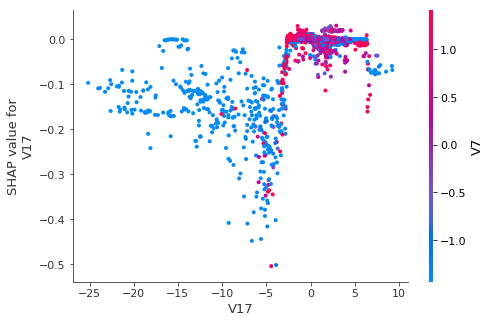

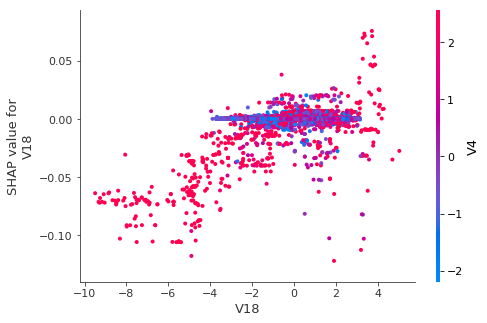

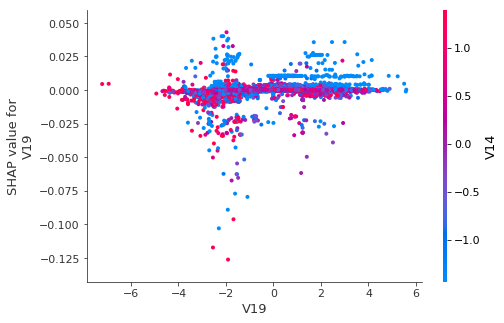

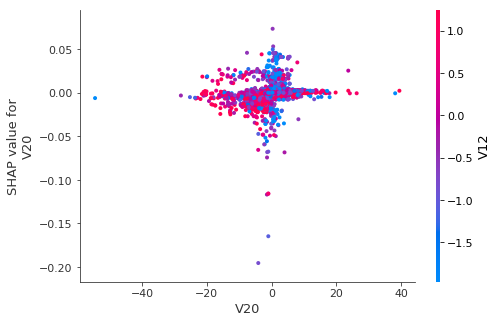

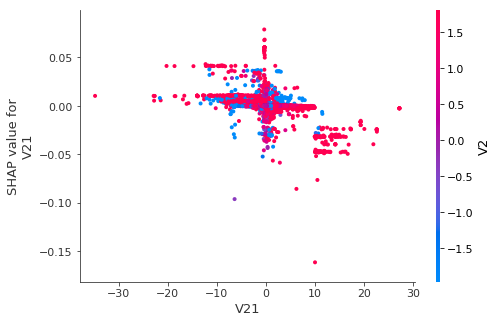

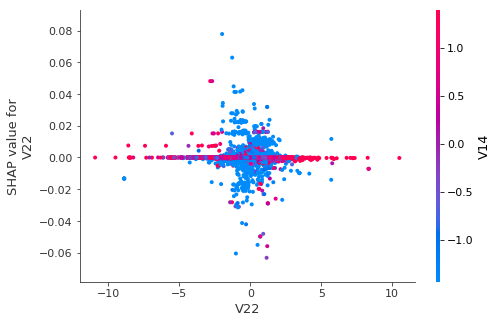

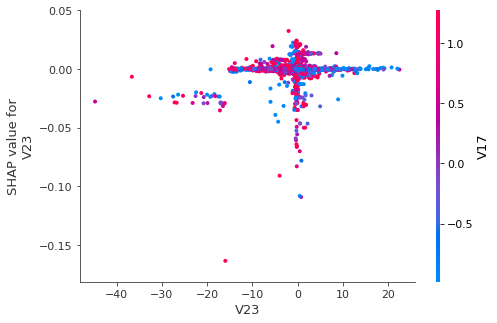

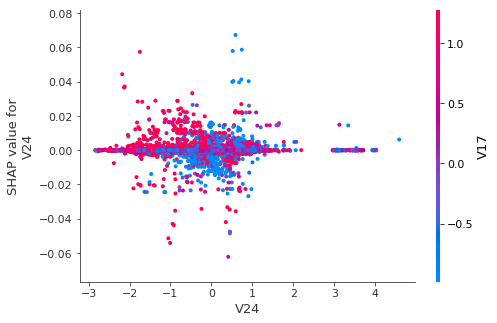

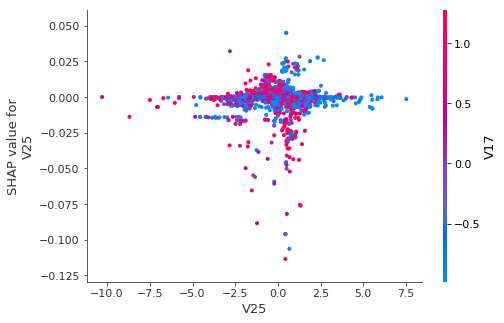

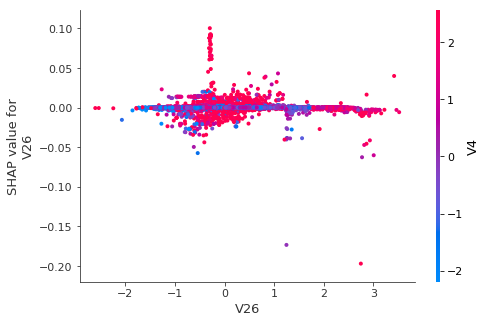

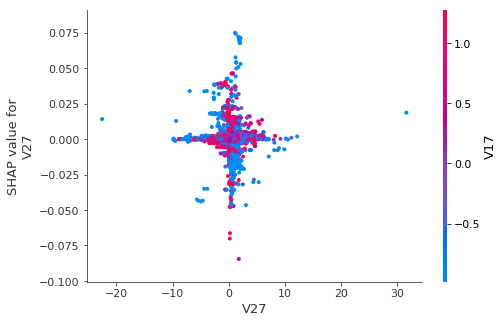

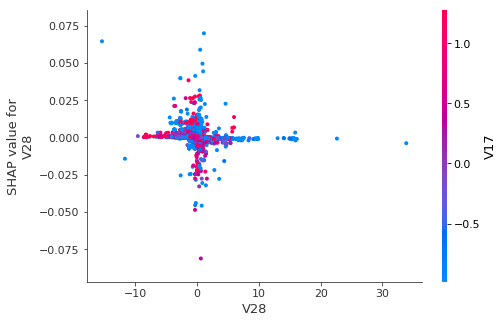

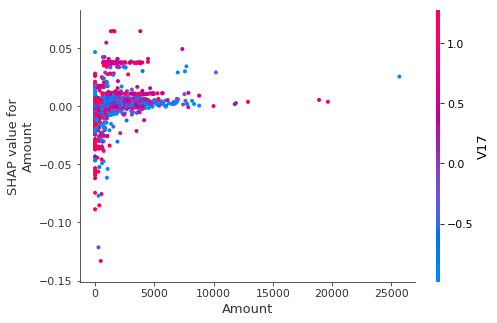

In [111]:
for name in X.columns:
    shap.dependence_plot(name, shap_values[1], X, display_features=X)

In [110]:
shap.force_plot(explainer.expected_value[1], shap_values[1][:1000,:], X.iloc[:1000,:])